In [ ]:
# Install Roboflow to fetch the dataset
!pip install roboflow

# Import Roboflow and download dataset using API key
from roboflow import Roboflow
rf = Roboflow(api_key="uRg1alqSD7dk8lBMRRko")

# Access your project and download dataset in folder format
project = rf.workspace("workspace2-vylmb").project("jellyfish-l2rea")
dataset = project.version(1).download("folder")


  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/a5/3e/dd9ba72528559149c0f04e47d30411392e0b9d8a2c8aa9319e65bf21600e/roboflow-1.1.23-py3-none-any.whl.metadata
  Obtaining dependency information for certifi==2023.7.22 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
  Obtaining dependency information for chardet==4.0.0 from https://files.pythonhosted.org/packages/19/c7/fa589626997dd07bd87d9269342ccb74b1720384a4d739a1872bd84fbe68/chardet-4.0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for cycler==0.10.0 from https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for idna==2.10 from https://files.pythonhosted.org/packages/a2/38/928ddce2273eaa564f6f50de919327bf3a00f091b5baba8dfa9460f3a8a8/id


Extracting Dataset Version Zip to Jellyfish-1 in folder:: 100%|██████████| 1002/1002 [00:00<00:00, 6788.91it/s]


In [ ]:

!pip install ultralytics

from IPython import display
display.clear_output()

# Run YOLO internal checks
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.26 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5519.1/8062.4 GB disk)


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import utils

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# Check downloaded folders
!ls

Jellyfish-1


In [ ]:
!ls Jellyfish-1

README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
# Clone YOLOv8 GitHub repo
!git clone https://github.com/ultralytics/yolov8

# Change into the yolov8 directory and install dependencies
%cd yolov8
%pip install -qr requirements.txt  # install

# Init YOLO utils
import torch
display = utils.notebook_init()  # checks

Cloning into 'yolov8'...
Username for 'https://github.com': 

In [ ]:
# Train classification model (YOLOv8n-cls) on jellyfish dataset

%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data={'/kaggle/input/jellyfish-roboflow-ori/Jellyfish.v1i.folder'} epochs=50 imgsz=128

/kaggle/working
100%|██████████████████████████████████████| 5.30M/5.30M [00:00<00:00, 92.3MB/s]
Ultralytics YOLOv8.1.26 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/kaggle/input/jellyfish-roboflow-ori/Jellyfish.v1i.folder, epochs=50, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

In [ ]:
# Check output weights directory
!ls /kaggle/working/runs/classify/train/weights

best.pt  last.pt


In [ ]:
# Run validation on best model
!yolo classify val model=/kaggle/working/runs/classify/train/weights/best.pt data={'/kaggle/input/jellyfish-roboflow-ori/Jellyfish.v1i.folder'}

Ultralytics YOLOv8.1.26 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1442566 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/input/jellyfish-roboflow-ori/Jellyfish.v1i.folder/train... found 658 images in 6 classes ✅ 
val: /kaggle/input/jellyfish-roboflow-ori/Jellyfish.v1i.folder/val... found 209 images in 6 classes ✅ 
test: /kaggle/input/jellyfish-roboflow-ori/Jellyfish.v1i.folder/test... found 112 images in 6 classes ✅ 
val: Scanning /kaggle/input/jellyfish-roboflow-ori/Jellyfish.v1i.folder/val... 2
val: WARNING ⚠️ Cache directory /kaggle/input/jellyfish-roboflow-ori/Jellyfish.v1i.folder is not writeable, cache not saved.
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:01<00:0
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <

In [ ]:
# Check validation results
!ls /kaggle/working/runs/classify/val2

confusion_matrix.png		 val_batch0_pred.jpg	val_batch2_labels.jpg
confusion_matrix_normalized.png  val_batch1_labels.jpg	val_batch2_pred.jpg
val_batch0_labels.jpg		 val_batch1_pred.jpg


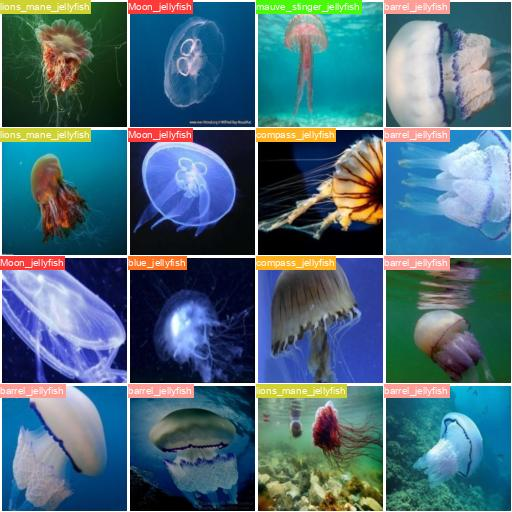

In [ ]:
# Show labeled prediction image
display(Image('/kaggle/working/runs/classify/val2/val_batch0_labels.jpg'))


In [ ]:
# Display confusion matrix
display(Image('/kaggle/working/runs/classify/train2/confusion_matrix.png'))


In [ ]:
# Display training summary plot
display(Image('/kaggle/working/runs/classify/train2/results.png'))


In [ ]:
# Load results CSV
pd.read_csv('/kaggle/working/yolov5/runs/train-cls/exp/results.csv')

In [ ]:
# Plot training & validation loss

results_path = '/kaggle/working/yolov5/runs/train-cls/exp/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['              test/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

In [ ]:
results.columns

In [ ]:
#Confusion Matrix Plot from Scratch

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Plots a confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
!python val.py --task

In [ ]:
#Image Count per Jellyfish Typet

# Define the paths to your folders
moon_jellyfish_path = "/kaggle/input/jellyfish-types/Moon_jellyfish"
barrel_jellyfish_path = "/kaggle/input/jellyfish-types/barrel_jellyfish"
blue_jellyfish_path = "/kaggle/input/jellyfish-types/blue_jellyfish"
compass_jellyfish_path = "/kaggle/input/jellyfish-types/compass_jellyfish"
lions_mane_jellyfish_path = "/kaggle/input/jellyfish-types/lions_mane_jellyfish"
mauve_stinger_jellyfish_path = "/kaggle/input/jellyfish-types/mauve_stinger_jellyfish"

# Function to count images in a folder
def count_images(folder_path):
    image_count = len([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
    return image_count

# Get image counts for each folder
moon_jellyfish_count = count_images(moon_jellyfish_path)
barrel_jellyfish_count = count_images(barrel_jellyfish_path)
blue_jellyfish_path_count = count_images(blue_jellyfish_path)
compass_jellyfish_path_count = count_images(compass_jellyfish_path)
lions_mane_jellyfish_path_count = count_images(lions_mane_jellyfish_path)
mauve_stinger_jellyfish_path_count = count_images(mauve_stinger_jellyfish_path)

# Plot the graph with adjusted figure size
folders = ['Moon Jellyfish', 'Barrel Jellyfish', 'Blue Jellyfish', 'Compass Jellyfish', 'Lion\'s Mane Jellyfish', 'Mauve Stinger Jellyfish']
image_counts = [moon_jellyfish_count, barrel_jellyfish_count, blue_jellyfish_path_count, compass_jellyfish_path_count,
                lions_mane_jellyfish_path_count, mauve_stinger_jellyfish_path_count]

# Use different colors for each bar
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Adjust figure size for better visualization
plt.figure(figsize=(12, 6))

plt.bar(folders, image_counts, color=colors)
plt.xlabel('Jellyfish Types', fontsize=18)
plt.ylabel('Image Count', fontsize=18)
plt.title('Image Count in Each Jellyfish Type Folder', fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("jellyfish_distribution_graph.png")
plt.show()


In [ ]:
#